In [92]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [93]:
df=pd.read_csv('customer satisfaction.csv')

In [94]:
df.head()

,id,gender,age,lifecycle,delivery_options,online_ordering_flow,chocolate_quality,chocolate_variety,chocolate_uniqueness,innovation,inspiration,payment_options,price_fairness,price_variety,price_comparison,packaging,satisfaction
0,1334268,Female,55,Returning,3,3,4,3,3,1,4,1,2,3,1,1,Neutral or Dissatisfied
1,25807,Female,39,First-time,1,1,4,1,3,2,3,1,5,5,2,1,Neutral or Dissatisfied
2,8091466,Female,56,Returning,2,2,2,3,3,2,3,2,2,5,2,2,Neutral or Dissatisfied
3,6008938,Female,64,Returning,4,3,5,5,3,4,4,3,3,4,4,3,Neutral or Dissatisfied
4,3030096,Male,59,Returning,5,3,1,5,4,1,1,3,2,5,1,3,Neutral or Dissatisfied


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    5000 non-null   int64 
 1   gender                5000 non-null   object
 2   age                   5000 non-null   int64 
 3   lifecycle             5000 non-null   object
 4   delivery_options      5000 non-null   int64 
 5   online_ordering_flow  5000 non-null   int64 
 6   chocolate_quality     5000 non-null   int64 
 7   chocolate_variety     5000 non-null   int64 
 8   chocolate_uniqueness  5000 non-null   int64 
 9   innovation            5000 non-null   int64 
 10  inspiration           5000 non-null   int64 
 11  payment_options       5000 non-null   int64 
 12  price_fairness        5000 non-null   int64 
 13  price_variety         5000 non-null   int64 
 14  price_comparison      5000 non-null   int64 
 15  packaging             5000 non-null   

In [96]:
df.describe()

,id,age,delivery_options,online_ordering_flow,chocolate_quality,chocolate_variety,chocolate_uniqueness,innovation,inspiration,payment_options,price_fairness,price_variety,price_comparison,packaging
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,5.068127e+06,39.415400,3.053400,2.763600,3.313600,3.245800,2.979800,3.386600,3.443400,3.357600,3.31060,3.211800,3.659400,2.739000
std,2.912816e+06,15.164657,1.514136,1.397321,1.266482,1.360497,1.286594,1.279636,1.308869,1.316081,1.30494,1.323666,1.173059,1.318342
min,1.586000e+03,7.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,2.566572e+06,27.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,2.000000
50%,5.070709e+06,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.00000,3.000000,4.000000,3.000000
75%,7.606288e+06,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,5.000000,4.000000
max,9.999241e+06,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000


In [97]:
df.memory_usage()

Index                     132
id                      40000
gender                  40000
age                     40000
lifecycle               40000
delivery_options        40000
online_ordering_flow    40000
chocolate_quality       40000
chocolate_variety       40000
chocolate_uniqueness    40000
innovation              40000
inspiration             40000
payment_options         40000
price_fairness          40000
price_variety           40000
price_comparison        40000
packaging               40000
satisfaction            40000
dtype: int64

In [98]:
df.memory_usage(index=True)

Index                     132
id                      40000
gender                  40000
age                     40000
lifecycle               40000
delivery_options        40000
online_ordering_flow    40000
chocolate_quality       40000
chocolate_variety       40000
chocolate_uniqueness    40000
innovation              40000
inspiration             40000
payment_options         40000
price_fairness          40000
price_variety           40000
price_comparison        40000
packaging               40000
satisfaction            40000
dtype: int64

In [99]:
df.memory_usage(deep=True) # Calculate true memory usage

Index                      132
id                       40000
gender                  269996
age                      40000
lifecycle               290930
delivery_options         40000
online_ordering_flow     40000
chocolate_quality        40000
chocolate_variety        40000
chocolate_uniqueness     40000
innovation               40000
inspiration              40000
payment_options          40000
price_fairness           40000
price_variety            40000
price_comparison         40000
packaging                40000
satisfaction            329522
dtype: int64

In [100]:
df['id'].astype('category').memory_usage(deep=True) # Use a Categorical for efficient storage of an object-dtype column with many repeated values.

182260

In [101]:
s=pd.Series(list('gender'))

In [102]:
s

0    g
1    e
2    n
3    d
4    e
5    r
dtype: object

In [103]:
df.select_dtypes(exclude=['string'])

,id,gender,age,lifecycle,delivery_options,online_ordering_flow,chocolate_quality,chocolate_variety,chocolate_uniqueness,innovation,inspiration,payment_options,price_fairness,price_variety,price_comparison,packaging,satisfaction
0,1334268,Female,55,Returning,3,3,4,3,3,1,4,1,2,3,1,1,Neutral or Dissatisfied
1,25807,Female,39,First-time,1,1,4,1,3,2,3,1,5,5,2,1,Neutral or Dissatisfied
2,8091466,Female,56,Returning,2,2,2,3,3,2,3,2,2,5,2,2,Neutral or Dissatisfied
3,6008938,Female,64,Returning,4,3,5,5,3,4,4,3,3,4,4,3,Neutral or Dissatisfied
4,3030096,Male,59,Returning,5,3,1,5,4,1,1,3,2,5,1,3,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9639973,Male,41,Returning,1,1,5,5,1,5,5,4,3,3,5,1,Satisfied
4996,2586817,Female,52,Returning,2,2,3,5,2,4,4,4,5,5,4,2,Satisfied
4997,7783931,Female,50,First-time,0,1,3,1,4,2,3,1,3,3,3,1,Neutral or Dissatisfied
4998,7871834,Male,24,First-time,3,3,2,3,3,2,2,5,2,2,3,3,Neutral or Dissatisfied


In [104]:
df.select_dtypes(include=['int64']) #  only integer values will provide.

,id,age,delivery_options,online_ordering_flow,chocolate_quality,chocolate_variety,chocolate_uniqueness,innovation,inspiration,payment_options,price_fairness,price_variety,price_comparison,packaging
0,1334268,55,3,3,4,3,3,1,4,1,2,3,1,1
1,25807,39,1,1,4,1,3,2,3,1,5,5,2,1
2,8091466,56,2,2,2,3,3,2,3,2,2,5,2,2
3,6008938,64,4,3,5,5,3,4,4,3,3,4,4,3
4,3030096,59,5,3,1,5,4,1,1,3,2,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9639973,41,1,1,5,5,1,5,5,4,3,3,5,1
4996,2586817,52,2,2,3,5,2,4,4,4,5,5,4,2
4997,7783931,50,0,1,3,1,4,2,3,1,3,3,3,1
4998,7871834,24,3,3,2,3,3,2,2,5,2,2,3,3


In [105]:
df.select_dtypes(exclude=['bool']) # it gives whole data along with bool 

,id,gender,age,lifecycle,delivery_options,online_ordering_flow,chocolate_quality,chocolate_variety,chocolate_uniqueness,innovation,inspiration,payment_options,price_fairness,price_variety,price_comparison,packaging,satisfaction
0,1334268,Female,55,Returning,3,3,4,3,3,1,4,1,2,3,1,1,Neutral or Dissatisfied
1,25807,Female,39,First-time,1,1,4,1,3,2,3,1,5,5,2,1,Neutral or Dissatisfied
2,8091466,Female,56,Returning,2,2,2,3,3,2,3,2,2,5,2,2,Neutral or Dissatisfied
3,6008938,Female,64,Returning,4,3,5,5,3,4,4,3,3,4,4,3,Neutral or Dissatisfied
4,3030096,Male,59,Returning,5,3,1,5,4,1,1,3,2,5,1,3,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9639973,Male,41,Returning,1,1,5,5,1,5,5,4,3,3,5,1,Satisfied
4996,2586817,Female,52,Returning,2,2,3,5,2,4,4,4,5,5,4,2,Satisfied
4997,7783931,Female,50,First-time,0,1,3,1,4,2,3,1,3,3,3,1,Neutral or Dissatisfied
4998,7871834,Male,24,First-time,3,3,2,3,3,2,2,5,2,2,3,3,Neutral or Dissatisfied


In [106]:
pd.get_dummies(s)

,d,e,g,n,r
0,False,False,True,False,False
1,False,True,False,False,False
2,False,False,False,True,False
3,True,False,False,False,False
4,False,True,False,False,False
5,False,False,False,False,True


In [107]:
df.describe(include=[object]) # Only string values it provides

,gender,lifecycle,satisfaction
count,5000,5000,5000
unique,2,2,2
top,Male,Returning,Neutral or Dissatisfied
freq,2502,4070,2823


In [108]:
df['age']=df['age'].astype('category')

In [109]:
df.describe(include=['category'])

,age
count,5000
unique,74
top,25
freq,140


In [110]:
df.describe(exclude=[np.number])                                                   

,gender,age,lifecycle,satisfaction
count,5000,5000,5000,5000
unique,2,74,2,2
top,Male,25,Returning,Neutral or Dissatisfied
freq,2502,140,4070,2823


In [111]:
df

,id,gender,age,lifecycle,delivery_options,online_ordering_flow,chocolate_quality,chocolate_variety,chocolate_uniqueness,innovation,inspiration,payment_options,price_fairness,price_variety,price_comparison,packaging,satisfaction
0,1334268,Female,55,Returning,3,3,4,3,3,1,4,1,2,3,1,1,Neutral or Dissatisfied
1,25807,Female,39,First-time,1,1,4,1,3,2,3,1,5,5,2,1,Neutral or Dissatisfied
2,8091466,Female,56,Returning,2,2,2,3,3,2,3,2,2,5,2,2,Neutral or Dissatisfied
3,6008938,Female,64,Returning,4,3,5,5,3,4,4,3,3,4,4,3,Neutral or Dissatisfied
4,3030096,Male,59,Returning,5,3,1,5,4,1,1,3,2,5,1,3,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9639973,Male,41,Returning,1,1,5,5,1,5,5,4,3,3,5,1,Satisfied
4996,2586817,Female,52,Returning,2,2,3,5,2,4,4,4,5,5,4,2,Satisfied
4997,7783931,Female,50,First-time,0,1,3,1,4,2,3,1,3,3,3,1,Neutral or Dissatisfied
4998,7871834,Male,24,First-time,3,3,2,3,3,2,2,5,2,2,3,3,Neutral or Dissatisfied


In [112]:
df.columns

Index(['id', 'gender', 'age', 'lifecycle', 'delivery_options',
       'online_ordering_flow', 'chocolate_quality', 'chocolate_variety',
       'chocolate_uniqueness', 'innovation', 'inspiration', 'payment_options',
       'price_fairness', 'price_variety', 'price_comparison', 'packaging',
       'satisfaction'],
      dtype='object')

In [117]:

#Isolate X and y
y=df.satisfaction
X=df.drop(columns=['satisfaction','id'])

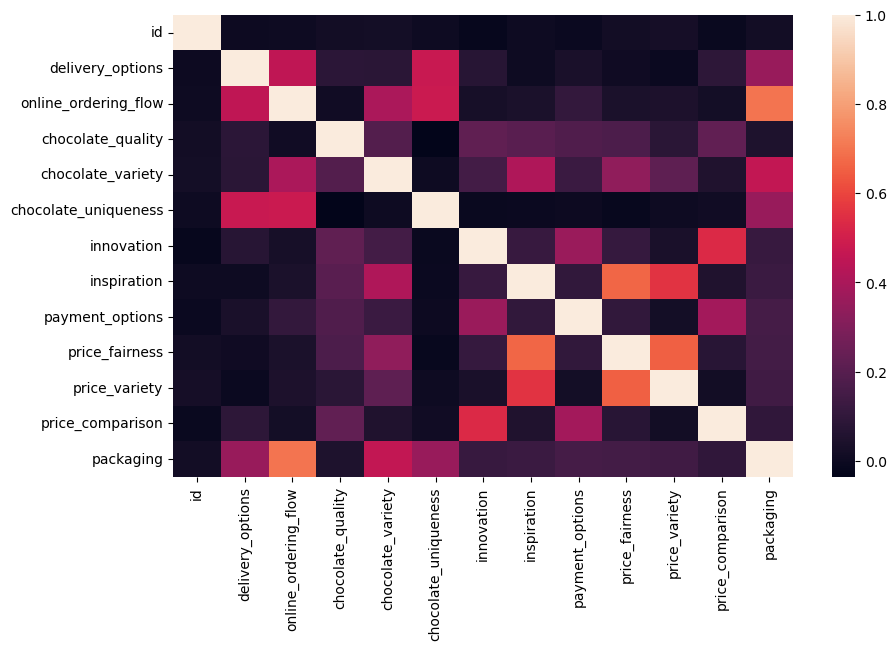

In [118]:
X = df.select_dtypes(include=[float, int])
fig,ax=plt.subplots(figsize=(10,6))
#Correlation heatmap
sns.heatmap(data=X.corr(),ax=ax)
plt.show()

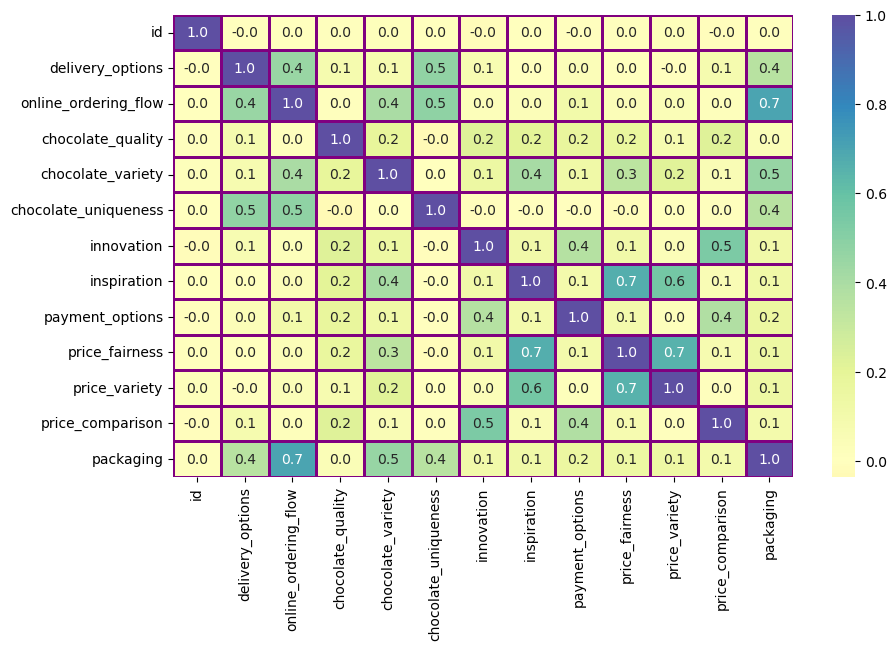

In [119]:
# Assuming 'X' is your DataFrame of numeric features
fig, ax =plt.subplots(figsize=(10, 6))

# Correct the heatmap function: directly use X.corr() as the data
sns.heatmap(X.corr(),
            #annot will include the correlation values in the chart
            annot=True,
            #to specify the decimal cases format
            fmt='.1f',
            #to include a middle point in the color map
            center=0,
            #Specify which color gradient map to include
            cmap='Spectral',
            #Specify the width of the lines between the heatmap rectangules
            linewidths=1,
             #Specify the color of the lines between rectangules
            linecolor='purple',
            #include the figsize specified initially
            ax=ax)
# Show the plot
plt.show()

In [34]:
X,y=np.arange(10).reshape((5,2)),range(5)

In [35]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [36]:
list(y)

[0, 1, 2, 3, 4]

In [37]:
##Training and Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1502)

In [38]:
X_train

array([[2, 3],
       [8, 9],
       [4, 5]])

In [39]:
X_test

array([[6, 7],
       [0, 1]])

In [40]:
y_train

[1, 4, 2]

In [41]:
y_test

[3, 0]

In [42]:
train_test_split(y,shuffle=False)

[[0, 1, 2], [3, 4]]

In [43]:
##Random Forest Model
model=RandomForestClassifier(n_estimators = 100,
                               random_state = 1502)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1502)

In [44]:
#Predictions
predictions=model.predict(X_test)
predictions[:2]

array([2, 1])

In [45]:
print(accuracy_score(y_test,predictions))

0.0


In [46]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1502,
 'verbose': 0,
 'warm_start': False}

In [47]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [48]:
param_grid

{'n_estimators': [100, 200],
 'max_depth': [None, 5],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2],
 'max_features': ['sqrt', 'log2']}

In [49]:
base_model=RandomForestClassifier(random_state = 1502)

In [50]:
grid_search = GridSearchCV(base_model, param_grid=param_grid, cv=KFold(n_splits=2), n_jobs=-1, verbose=1)
 
# Fit the grid search object to the data
grid_search.fit(X, y)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=1502), n_jobs=-1,
             param_grid={'max_depth': [None, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=1)

In [51]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.0


In [52]:
# isolating the best parameters.
best_params=grid_search.best_params_
best_params

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [53]:
# Tuned model
tuned_model = RandomForestClassifier(max_depth = best_params['max_depth'],
                                     max_features = best_params['max_features'],
                                     min_samples_leaf = best_params['min_samples_leaf'],
                                     min_samples_split = best_params['min_samples_split'],
                                     n_estimators = best_params['n_estimators'],
                                     random_state = 1502)
tuned_model.fit(X, y)

RandomForestClassifier(random_state=1502)

In [54]:
#Feature Importance

X = pd.DataFrame(X)

# Now you can access columns like this:
importance = pd.Series(tuned_model.feature_importances_,
                      index=X.columns.values,
                      name="importance")

In [55]:
importance = importance.drop(["age", "gender", "satisfaction"], errors='ignore')

In [56]:
importance

0    0.556812
1    0.443188
Name: importance, dtype: float64

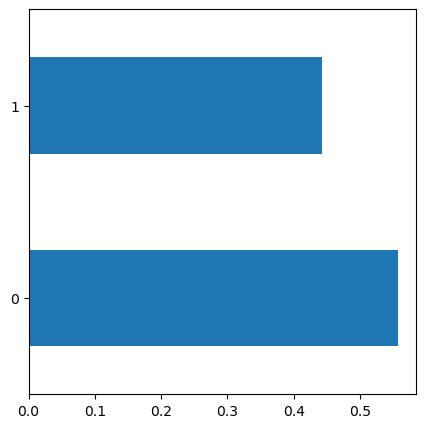

In [57]:
importance.nlargest(2).plot(kind = 'barh',
                            figsize = (5,5))
plt.show()

In [82]:
print(X.columns)


RangeIndex(start=0, stop=2, step=1)


In [83]:
scoring = X.drop(columns=["age", "gender", "satisfaction"], errors='ignore').mean().rename("scoring")

In [84]:
scoring

0    4.0
1    5.0
Name: scoring, dtype: float64

In [85]:
# Create DataFrame
df_drivers = pd.concat([importance, scoring], axis = 1)

In [86]:
df_drivers

,importance,scoring
0,0.556812,4.0
1,0.443188,5.0


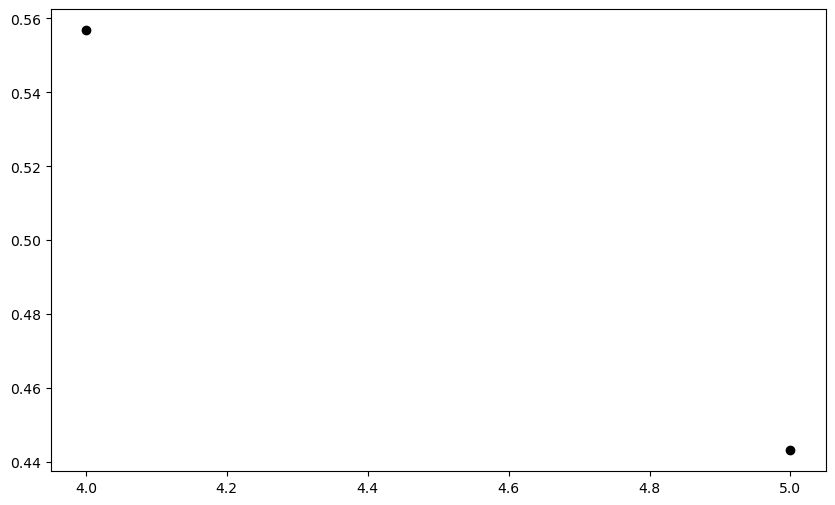

In [87]:
fig, ax = plt.subplots(figsize=(10,6)) 
 
#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")
 
plt.show()

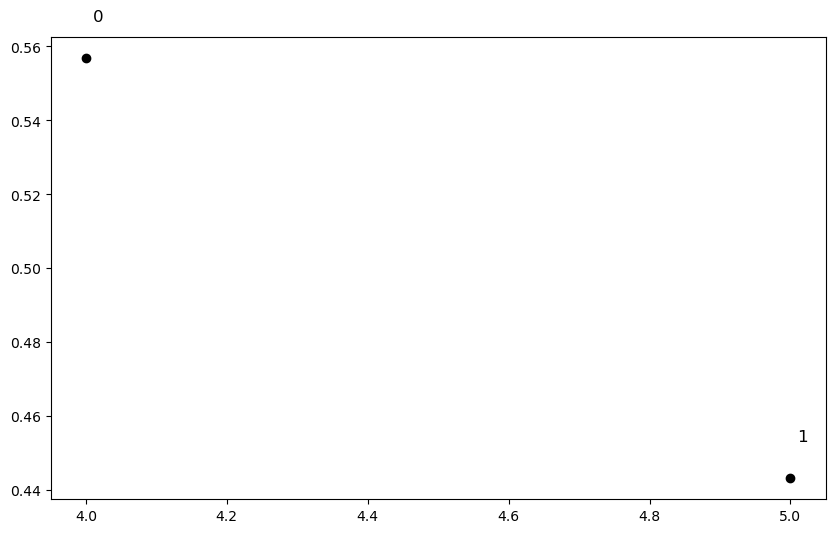

In [88]:
#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 
 
#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")
 
#Adding text
for idx, row in df_drivers.iterrows(): 
    plt.text(row['scoring'] + 0.01, row['importance'] + 0.01, 
             idx,
             size = "large")
 
plt.show()

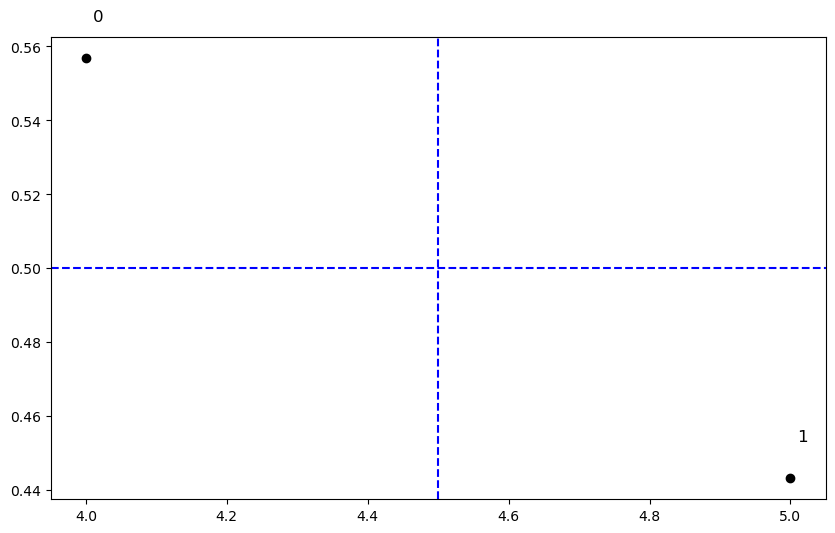

In [89]:
#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 
 
#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")
 
#Adding text
for idx, row in df_drivers.iterrows(): 
    plt.text(row['scoring'] + 0.01, row['importance'] + 0.01, 
             idx,
             size = "large")
 
#Add vertical and horizontal line
plt.axvline(df_drivers.scoring.mean(), 
            color = "b", 
            linestyle = "dashed")
plt.axhline(df_drivers.importance.mean(), 
            color = "b", 
            linestyle = "dashed")
 
plt.show()

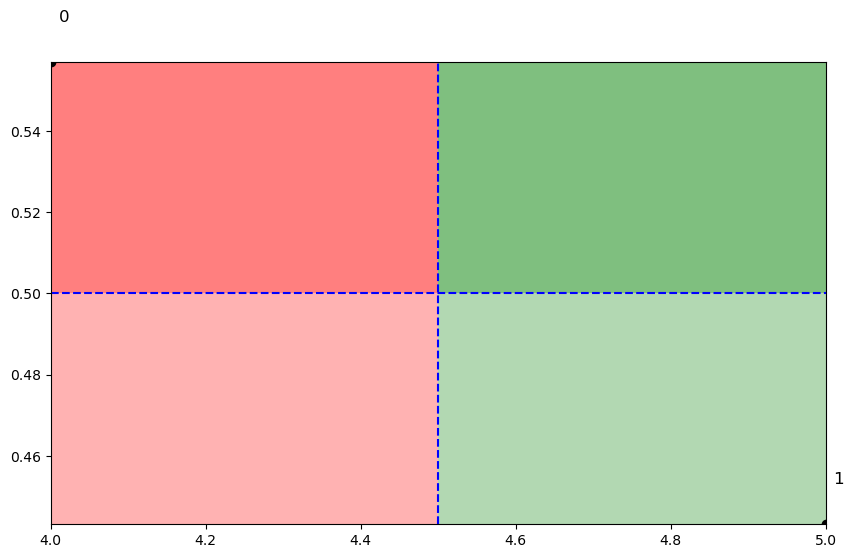

In [90]:
#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 
 
# colouring
ax.margins(0)
ax.axvspan(df_drivers.scoring.mean(), 
           df_drivers.scoring.max(), 
           facecolor='green', 
           alpha=0.5)
ax.axvspan(df_drivers.scoring.min(), 
           df_drivers.scoring.mean(), 
           facecolor='red', 
           alpha=0.5)
ax.axhspan(df_drivers.importance.min(), 
           df_drivers.importance.mean(), 
           facecolor='white', 
           alpha=0.4)
 
 
#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")
 
#Adding text
for idx, row in df_drivers.iterrows(): 
    plt.text(row['scoring'] + 0.01, row['importance'] + 0.01, 
             idx,
             size = "large")
 
#Add vertical and horizontal line
plt.axvline(df_drivers.scoring.mean(), 
            color = "b", 
            linestyle = "dashed")
plt.axhline(df_drivers.importance.mean(), 
            color = "b", 
            linestyle = "dashed")
 
plt.show()

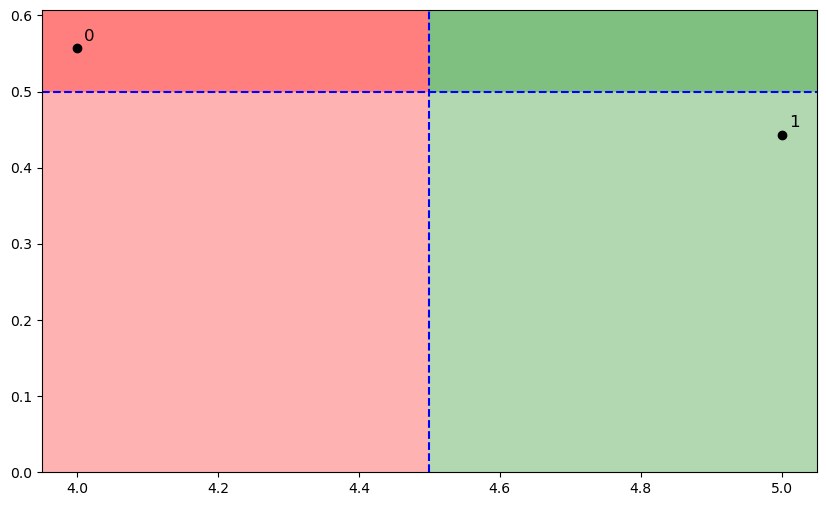

In [91]:
#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 
 
# colouring
ax.margins(0)
ax.axvspan(df_drivers.scoring.mean(), 
           df_drivers.scoring.max()+0.05, 
           facecolor='green', 
           alpha=0.5)
ax.axvspan(df_drivers.scoring.min()-0.05, 
           df_drivers.scoring.mean(), 
           facecolor='red', 
           alpha=0.5)
ax.axhspan(0, 
           df_drivers.importance.mean(), 
           facecolor='white', 
           alpha=0.4)
ax.axhspan(0, 
           df_drivers.importance.max() + 0.05, 
           facecolor='white', 
           alpha=0)
 
#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")
 
#Adding text
for idx, row in df_drivers.iterrows(): 
    plt.text(row['scoring'] + 0.01, row['importance'] + 0.01, 
             idx,
             size = "large")
 
#Add vertical and horizontal line
plt.axvline(df_drivers.scoring.mean(), 
            color = "b", 
            linestyle = "dashed")
plt.axhline(df_drivers.importance.mean(), 
            color = "b", 
            linestyle = "dashed")
 
plt.show()